In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data=data.drop_duplicates()

In [7]:
data_dup= data.duplicated().any()

In [8]:
data_dup

False

In [9]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns= cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [16]:
X = data.drop('target',axis=1)

In [17]:
y=data['target']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from random import random


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\Zainab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred1 = log.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred1)

0.7704918032786885

In [25]:
from sklearn import svm

In [26]:
svm = svm.SVC()

In [27]:
svm.fit(X_train,y_train)

SVC()

In [28]:
y_pred2 = svm.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred2)

0.5573770491803278

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred3=knn.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred3)

0.639344262295082

In [35]:
score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [36]:
import matplotlib.pyplot as plt

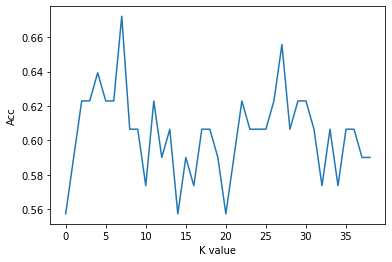

In [37]:
plt.plot(score)
plt.xlabel("K value")
plt.ylabel("Acc")
plt.show()

In [38]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [39]:
data= pd.read_csv('heart.csv')

In [40]:
data = data.drop_duplicates()

In [41]:
X=data.drop('target',axis=1)
y=data['target']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()

In [45]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred4 =dt.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred5 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbc = GradientBoostingClassifier()

In [55]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:
y_pred6 = gbc.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [58]:
final_data = pd.DataFrame({'Models' : ['LR','SVM','KNN','DT','RF','GB'], 
'ACC' : [accuracy_score(y_test,y_pred1)*100,accuracy_score(y_test,y_pred2)*100,accuracy_score(y_test,y_pred3)*100,accuracy_score(y_test,y_pred4)*100,accuracy_score(y_test,y_pred5)*100,accuracy_score(y_test,y_pred6)*100]})

In [59]:
final_data

,Models,ACC
0,LR,77.049180
1,SVM,55.737705
2,KNN,63.934426
3,DT,72.131148
4,RF,85.245902
5,GB,80.327869


In [60]:
import seaborn as sns

c:\Users\Zainab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

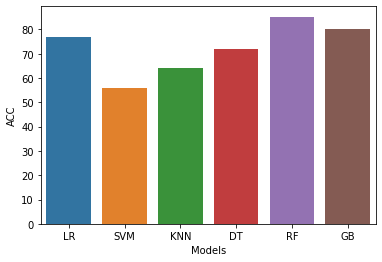

In [61]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [62]:
X=data.drop('target',axis=1)
y=data['target']

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [65]:
import pandas as pd

In [66]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])

In [67]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [68]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [69]:
import joblib

In [70]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [71]:
model = joblib.load('model_joblib_heart')

In [72]:
model.predict(new_data)

array([0], dtype=int64)

In [73]:
from tkinter import *
import joblib

In [74]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

c:\Users\Zainab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
